In [55]:
data(iris)

In [56]:
# 목표변수 (Species 제외)
iris2 = iris[, 1:4]

In [57]:
km.out.withness = c()
km.out.between = c()
kk = c()

In [58]:
for(i in 2:7){
    set.seed(1)
    km.out = kmeans(iris2, centers=i)
    # 군집 내 제곱합 저장
    km.out.withness[i-1] = km.out$tot.withinss
    # 군집 간 제곱합 저장
    km.out.between[i-1] = km.out$betweenss
    kk = c(kk, (paste0('k=', i)))
    }

In [59]:
tt =data.frame(kk, km.out.withness, km.out.between)

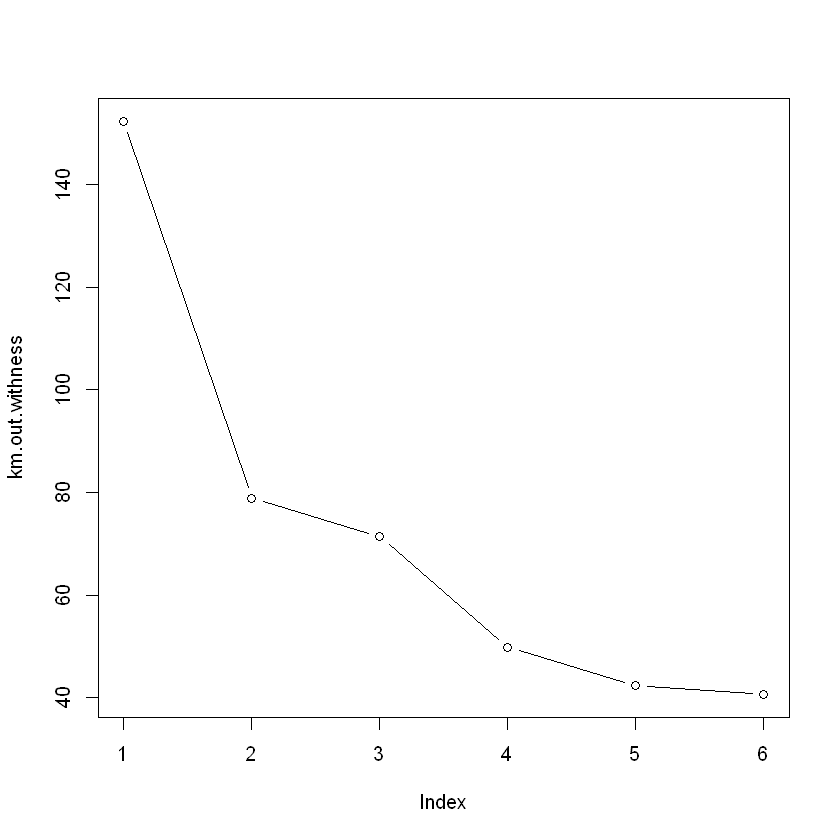

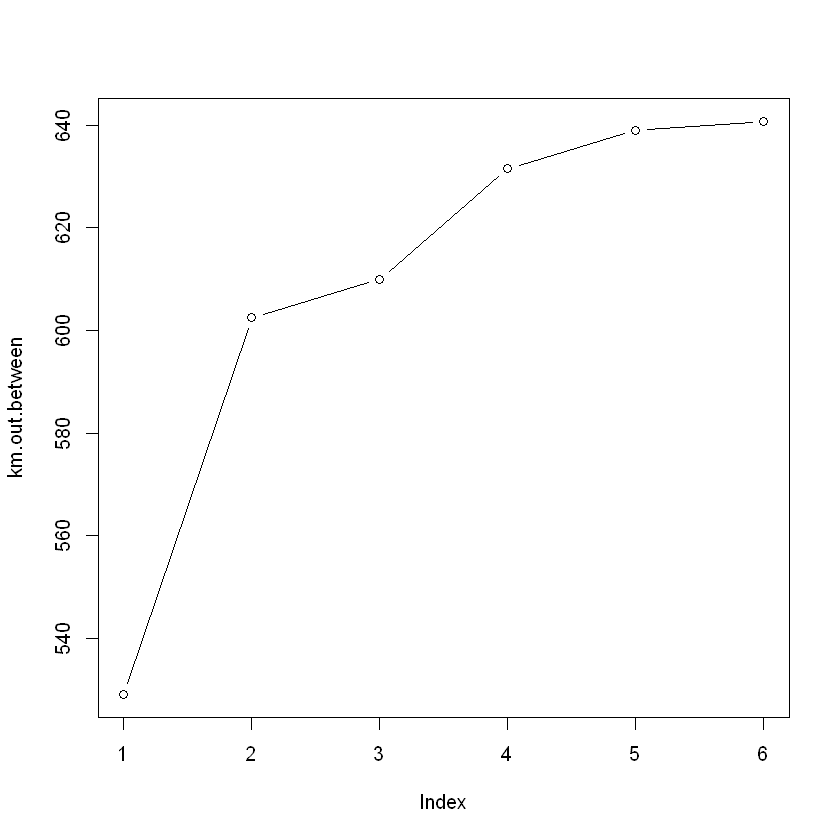

In [60]:
plot(km.out.withness, type='b')
plot(km.out.between, type='b')

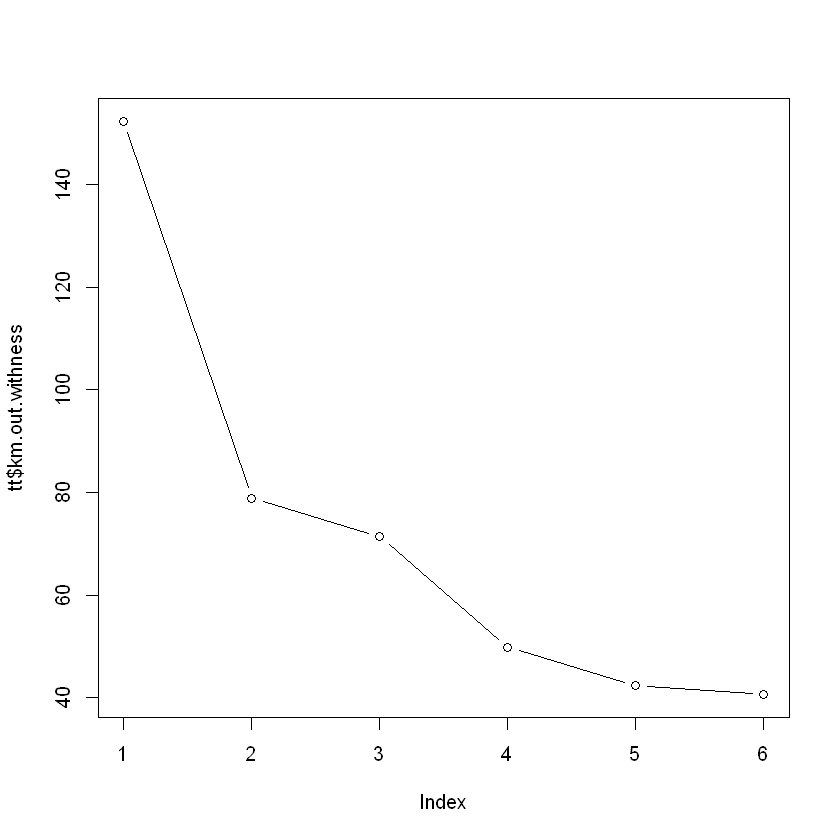

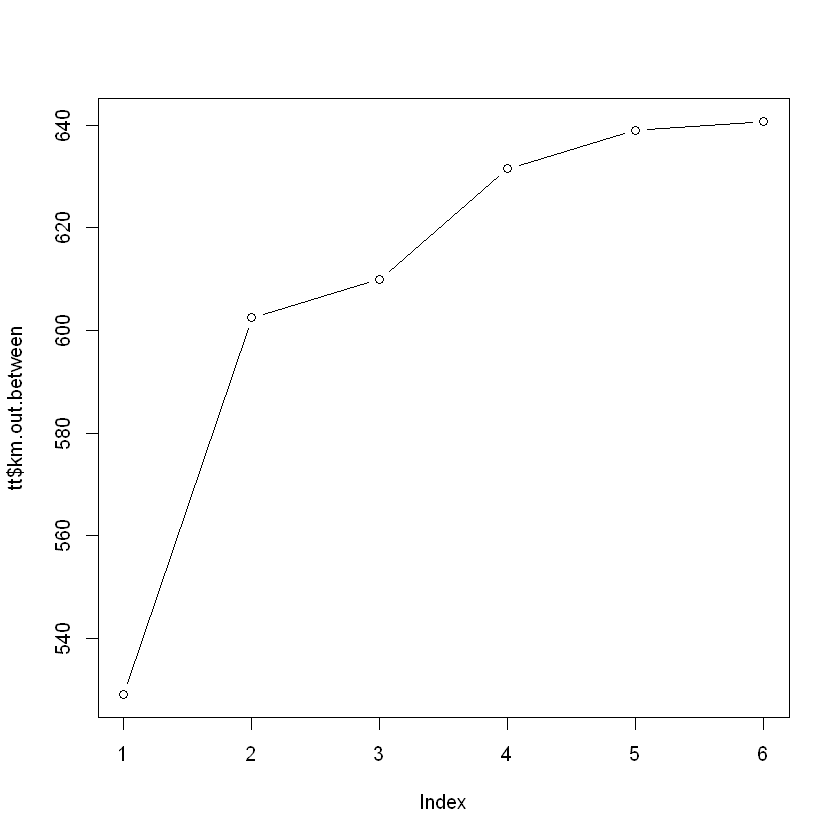

In [64]:
plot(tt$km.out.withness, type='b')
plot(tt$km.out.between, type='b')

In [68]:
km.out.k3 = kmeans(iris2, centers=3)

In [69]:
km.out.k3$centers

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
6.850000,3.073684,5.742105,2.071053
5.901613,2.748387,4.393548,1.433871
5.006000,3.428000,1.462000,0.246000


In [73]:
print(km.out.k3$cluster)

  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
[112] 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
[149] 1 2


In [74]:
print(km.out.k3$size)

[1] 38 62 50


In [75]:
# 군집결과와 원래 품종 개수 비교
table(km.out.k3$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0          2        36
  2      0         48        14
  3     50          0         0

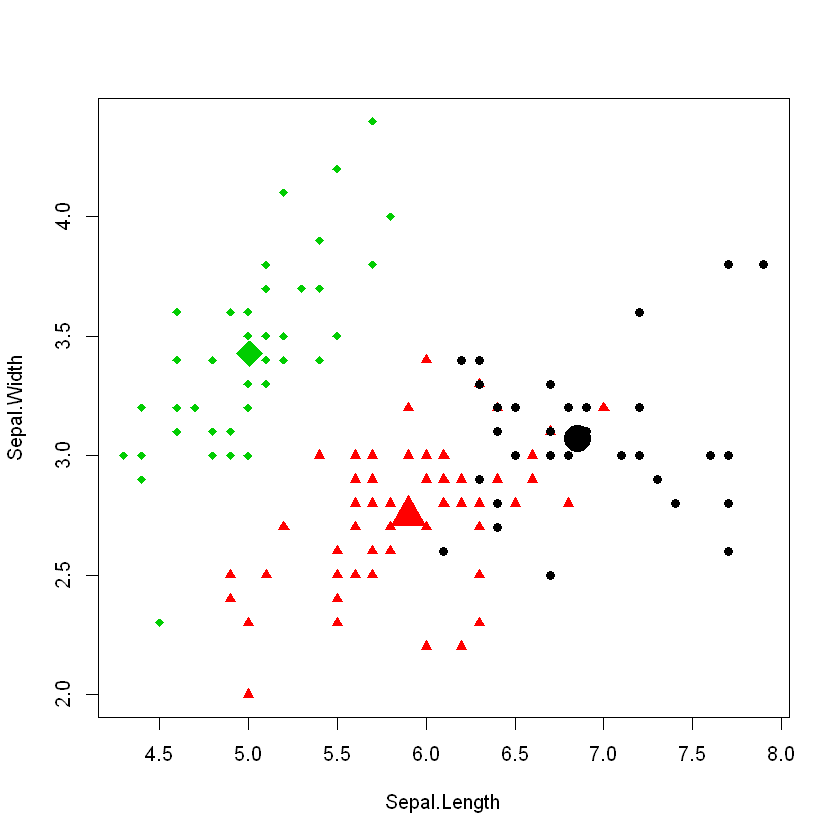

In [79]:
plot(iris[,1:2], col=km.out.k3$cluster, pch=ifelse(km.out.k3$cluster==1, 16, 
                                                   ifelse(km.out.k3$cluster==2, 17, 18)), cex=1)
points(km.out.k3$centers, col=1:3, pch=16:18, cex=3)

### Demensionality Reduction

In [81]:
pc1 = princomp(USArrests, cor=T)

In [89]:
head(pc1)

$sdev
   Comp.1    Comp.2    Comp.3    Comp.4 
1.5748783 0.9948694 0.5971291 0.4164494 

$loadings

Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

$center
  Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232 

$scale
   Murder   Assault  UrbanPop      Rape 
 4.311735 82.500075 14.329285  9.272248 

$n.obs
[1] 50

$scores
                    Comp.1      Comp.2      Comp.3       Comp.4
Alabama         0.98556588  1.13339238  0.44426879  0.156267145
Alaska          1.95013775  1.07321326 -2.04000333 -0.438583440
Arizona         1.76316354 -0.74595678 -0.05478082 -0.834652924
Arkansas       -0.14142029  1.11979678 -0.11457369 -0.182810896
California     

In [84]:
summary(pc1)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

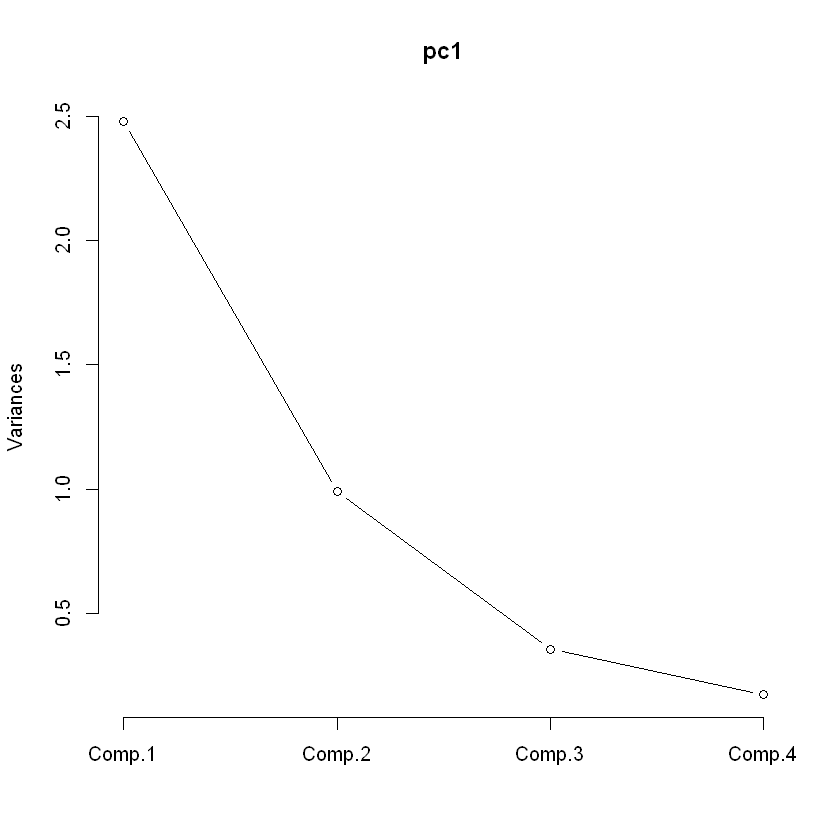

In [88]:
screeplot(pc1, type='l')

In [90]:
pc1$center

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [91]:
pc1$scale

Murder   Assault  UrbanPop      Rape 
 4.311735 82.500075 14.329285  9.272248

In [92]:
pc1$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

In [95]:
pc1$scores

,Comp.1,Comp.2,Comp.3,Comp.4
Alabama,0.98556588,1.13339238,0.44426879,0.156267145
Alaska,1.95013775,1.07321326,-2.04000333,-0.438583440
Arizona,1.76316354,-0.74595678,-0.05478082,-0.834652924
Arkansas,-0.14142029,1.11979678,-0.11457369,-0.182810896
California,2.52398013,-1.54293399,-0.59855680,-0.341996478
Colorado,1.51456286,-0.98755509,-1.09500699,0.001464887
Connecticut,-1.35864746,-1.08892789,0.64325757,-0.118469414
Delaware,0.04770931,-0.32535892,0.71863294,-0.881977637
Florida,3.01304227,0.03922851,0.57682949,-0.096284752
Georgia,1.63928304,1.27894240,0.34246008,1.076796812


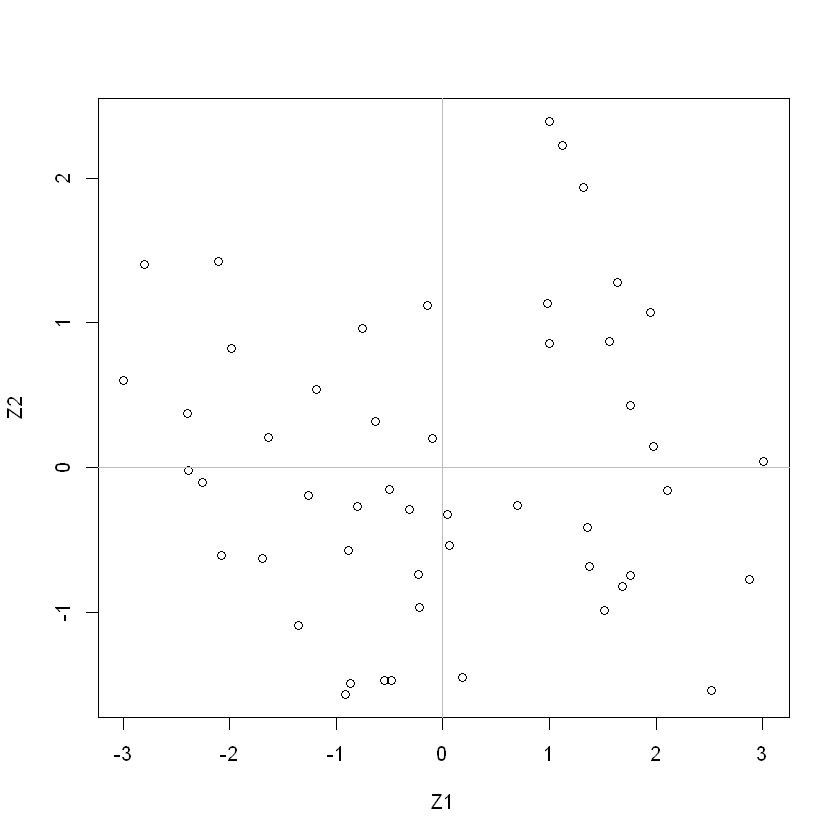

In [93]:
plot(pc1$scores[, 1],pc1$scores[, 2], xlab='Z1', ylab='Z2')
abline(v=0, h=0, col='gray')

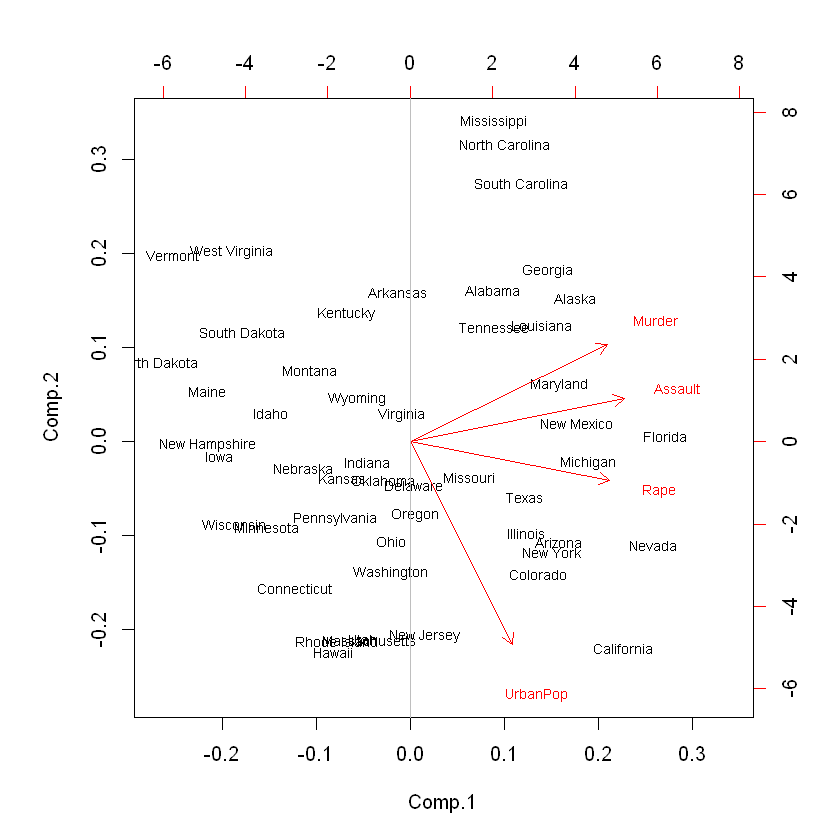

In [94]:
biplot(pc1, cex=0.7)
abline(v=0,b=0,col='gray')